# TODO

* [x] предварительная обработка (очистка, лемматизация, удаление стоп-слов)
* [x] выделение тем (topic modeling)
* [ ] выделение тем c ассоциированными новостями (topic modeling)
* [ ] выделение смысловой выжимки (text summarization) ???
* [ ] выделение тренда
* [ ] (доп) подбор релевантных новостей по выборке

# Инициализация

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
# df1 = pd.read_csv("df0_cleaned.csv")
df1 = pd.read_csv("cbr.csv") # датасет получен скрапингом, после очистки вместо него грузить очищенные данные

In [3]:
# df2 = pd.read_csv("df1_cleaned.csv")
df2 = pd.read_csv("smart_lab.csv") # датасет получен скрапингом, после очистки вместо него грузить очищенные данные

In [4]:
# df3 = pd.read_csv("df2_cleaned.csv")
df3 = pd.read_csv("banki.csv") # датасет получен скрапингом, после очистки вместо него грузить очищенные данные

In [5]:
dfs = [df1,df2, df3]

In [6]:
df1.head(5)

Unnamed: 0                                      url  \
0           0  https://www.cbr.ru/press/event/?id=6349   
1           1  https://www.cbr.ru/press/event/?id=6350   
2           2  https://www.cbr.ru/press/event/?id=6352   
3           3  https://www.cbr.ru/press/event/?id=6355   
4           4  https://www.cbr.ru/press/event/?id=6357   

                                               title  \
0  Инфляционные ожидания в январе преимущественно...   
1  Средневзвешенная ставка по ипотечным кредитам ...   
2  Банк России одобрил более 100 инициатив рынка ...   
3  Объявлен сбор заявок на Конкурс экономических ...   
4  Банк России публикует план подготовки норматив...   

                                                text                 date  \
0  В начале года ожидаемая населением инфляция сн...  2020-01-30T00:00:00   
1  Средневзвешенная процентная ставка по ипотечны...  2020-01-30T00:00:00   
2  Подведены первые итоги деятельности Рабочей гр...  2020-01-31T00:00:00   
3  Банк России и научный журнал «Деньги и кредит»...  2020-02-06T00:00:00   
4  В 2020 году Банк России намерен выпустить 35 н...  2020-02-07T00:00:00   

   url_preview  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [9]:
df2.head(5)

Unnamed: 0.1  Unnamed: 0                                   url  \
0             0           0  https://smart-lab.ru/blog/566086.php   
1             1           1  https://smart-lab.ru/blog/566081.php   
2             2           2  https://smart-lab.ru/blog/566080.php   
3             3           3  https://smart-lab.ru/blog/566077.php   
4             4           4  https://smart-lab.ru/blog/566076.php   

                                               title  \
0  АФК Система - выкупила 7,639 млн акции с 26.09...   
1  НМТП - нормализованный грузооборот Группы за 8...   
2  Русал - вложит 500 млн руб в оборудование для ...   
3  Роснефть фундаментально недооценена - Велес Ка...   
4  История с появлением на рынке базы персональны...   

                                                text                 date  \
0  АФК «Система» сообщает, что АО «Система Финанс...  2019-10-07T00:00:00   
1  Группа НМТП сообщает, что нормализованный груз...  2019-10-07T00:00:00   
2  ОК "Русал" инвестирует порядка 500 миллионов р...  2019-10-07T00:00:00   
3  В текущем году акции «Роснефти» не пользуются ...  2019-10-07T00:00:00   
4  История с появлением на рынке базы персональны...  2019-10-07T00:00:00   

   url_preview                                         text_clean  \
0          NaN  афк «система» сообщает, что ао «система финанс...   
1          NaN  группа нмтп сообщает, что нормализованный груз...   
2          NaN  ок "русал" инвестирует порядка 500 миллионов р...   
3          NaN  в текущем году акции «роснефти» не пользуются ...   
4          NaN  история с появлением на рынке базы персональны...   

                                         title_clean  
0  афк система - выкупила 7,639 млн акции с 26.09...  
1  нмтп - нормализованный грузооборот группы за 8...  
2  русал - вложит 500 млн руб в оборудование для ...  
3  роснефть фундаментально недооценена - велес ка...  
4  история с появлением на рынке базы персональны...

In [8]:
corpus = df2["text"].to_list()
corpus

['АФК «Система» сообщает, что АО «Система Финанс» (подконтрольная АФК организация) приобрела 7 639 300 обыкновенных акций АФК после объявления о запуске программы выкупа акций 17 сентября 2019 г. \r\nАкции были приобретены на Московской бирже (ММВБ) уполномоченным «Система Финанс» брокером в период с 26 сентября 2019 г. по 2 октября 2019 г. и переданы «Система Финанс» 4 октября 2019 г.\n\r\nС начала запуска Программы «Система Финанс» приобрела 32 358 700 обыкновенных акций\n\nсообщение',
 'Группа НМТП сообщает, что нормализованный грузооборот Группы НМТП (с учетом продажи ООО «НЗТ») за 8 месяцев 2019 года вырос на 7,9% относительно аналогичного периода прошлого года.\xa0Основные драйверы\xa0Увеличение объемов перевалки сырой нефти (+23%) на фоне общего роста экспорта данного сырья из России.Рост объемов перевалки химических грузов (+22,4%) за счет увеличения отгрузок опасных минеральных удобрений в направлении стран Южной и Северной Америки, а также неопасных минеральных удобрений в на

# [+] Очистка текста

* ссылки
* unicode
* переносы

https://towardsdatascience.com/a-guide-to-cleaning-text-in-python-943356ac86ca


In [18]:
!pip install clean-text

     ------------------------------------ 175.4/175.4 kB 878.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 53.1/53.1 kB ? eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171032 sha256=ecfd0cd8e8b318e63cfead9d68724a9620a3dc97b4d1691fd9c2604616ea2c5f
  Stored in directory: c:\users\1pc\appdata\local\pip\cache\wheels\fa\7a\e9\22dd0515e1bad255e51663ee513a2fa839c95934c5fc301090
Successfully built emoji


In [6]:
from cleantext import clean
from cleantext.sklearn import CleanTransformer

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [7]:
from tqdm.notebook import tqdm
def clean1(x):
    result = clean(x,
        fix_unicode=True,               # fix various unicode errors
        to_ascii=False,                  # transliterate to closest ASCII representation
        lower=True,                     # lowercase text
        no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
        no_urls=True,                  # replace all URLs with a special token
        no_emails=True,                # replace all email addresses with a special token
        no_phone_numbers=False,         # replace all phone numbers with a special token
        no_numbers=False,               # replace all numbers with a special token
        no_digits=False,                # replace all digits with a special token
        no_currency_symbols=False,      # replace all currency symbols with a special token
        no_punct=False,                 # remove punctuations
        replace_with_punct="",          # instead of removing punctuations you may replace them
        replace_with_url="",
        replace_with_email="",
        replace_with_phone_number="",
        replace_with_number="",
        replace_with_digit="",
        replace_with_currency_symbol="",
        lang="ru"                       # set to 'de' for German special handling
    )
    return result
for idx, df_item in tqdm(enumerate(dfs)):
    df_item["text_clean"] = df_item["text"].apply(lambda x: clean1(x))
    df_item["title_clean"] = df_item["title"].apply(lambda x: clean1(x))
    df_item = df_item.dropna(subset=['title', 'text','title_clean','text_clean'])
    df_item.to_csv(f"df{idx}_cleaned.csv")

0it [00:00, ?it/s]

In [8]:
df1 = None
del df1

df2 = None
del df2

df3 = None
del df3

# Инициализация после очистки

In [8]:
df0 = pd.read_csv("df0_cleaned.csv").dropna(subset=['title', 'text','title_clean','text_clean'])
df1 = pd.read_csv("df1_cleaned.csv").dropna(subset=['title', 'text','title_clean','text_clean'])
df2 = pd.read_csv("df2_cleaned.csv").dropna(subset=['title', 'text','title_clean','text_clean'])
dfs = [df0, df1, df2]
df2.head(5)

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  \
0             0             0           0   
1             1             1           1   
2             2             2           2   
3             3             3           3   
4             4             4           4   

                                            url  \
0  https://www.banki.ru/news/lenta/?id=10906999   
1  https://www.banki.ru/news/lenta/?id=10907000   
2  https://www.banki.ru/news/lenta/?id=10907001   
3  https://www.banki.ru/news/lenta/?id=10907002   
4  https://www.banki.ru/news/lenta/?id=10907004   

                                               title  \
0         Фондовые торги в России открылись в минусе   
1         Заубер Банк повысил ставки по двум вкладам   
2                     Рубль дешевеет в начале торгов   
3  БКС предложил посетителям Банки.ру инвестпроду...   
4  ​Средневзвешенный курс доллара на 11:30 мск вы...   

                                                text                 date  \
0  \n\n\nРоссийские фондовые индексы начали торго...  2019-09-26T10:03:00   
1  \n\n\nЗаубер Банк поднял ставки по двум депози...  2019-09-26T10:26:00   
2  \n\n\nРубль дешевеет к доллару и евро в начале...  2019-09-26T10:29:00   
3  \n\n\nБКС предлагает посетителям Банки.ру инве...  2019-09-26T09:56:00   
4  \n\n\nСредневзвешенный курс доллара на единой ...  2019-09-26T11:35:00   

                                         url_preview  \
0  https://static4.banki.ru/ugc/c0/56/66/f2/previ...   
1  https://static3.banki.ru/ugc/90/40/ac/d5/previ...   
2  https://static2.banki.ru/ugc/ac/57/be/68/previ...   
3  https://static3.banki.ru/ugc/58/9a/af/a5/previ...   
4  https://static2.banki.ru/ugc/b0/93/dd/5a/previ...   

                                          text_clean  \
0  российские фондовые индексы начали торговую се...   
1  заубер банк поднял ставки по двум депозитам.вк...   
2  рубль дешевеет к доллару и евро в начале валют...   
3  бкс предлагает посетителям банки.ру инвестиции...   
4  средневзвешенный курс доллара на единой торгов...   

                                         title_clean  
0         фондовые торги в россии открылись в минусе  
1         заубер банк повысил ставки по двум вкладам  
2                     рубль дешевеет в начале торгов  
3  бкс предложил посетителям банки.ру инвестпроду...  
4  ​средневзвешенный курс доллара на 11:30 мск вы...

# [+] Стемминг, лемматизация на NLTK

https://medium.com/mlearning-ai/nlp-03-lemmatization-and-stemming-using-spacy-b2829becceca

In [9]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer

In [10]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\1PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\1PC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [23]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
porter = PorterStemmer()
lancaster=LancasterStemmer()
snowball = SnowballStemmer(language="russian")

In [24]:
snowball.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [31]:
def lemmatize_stem_text_NLTK(text):
    result = []
    # return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    for w in w_tokenizer.tokenize(text): # tokenizer разбивает строку на список токенов-строк
        tmp = lemmatizer.lemmatize(w)
        # tmp = snowball.stem(tmp)
        result.append(tmp)
    return result

In [26]:
df_item = df1.copy()
# df_item["text_clean"][0]
# lemmatize_text(df_item["text_clean"][0])
# df_item.drop(columns = ["text_processed"])
df_item["text_processed"] = df_item["text_clean"].apply(lambda x: lemmatize_stem_text_NLTK(x))
df_item.head(5)

Unnamed: 0.1  Unnamed: 0                                      url  \
0             0           0  https://www.cbr.ru/press/event/?id=6349   
1             1           1  https://www.cbr.ru/press/event/?id=6350   
2             2           2  https://www.cbr.ru/press/event/?id=6352   
3             3           3  https://www.cbr.ru/press/event/?id=6355   
4             4           4  https://www.cbr.ru/press/event/?id=6357   

                                               title  \
0  Инфляционные ожидания в январе преимущественно...   
1  Средневзвешенная ставка по ипотечным кредитам ...   
2  Банк России одобрил более 100 инициатив рынка ...   
3  Объявлен сбор заявок на Конкурс экономических ...   
4  Банк России публикует план подготовки норматив...   

                                                text                 date  \
0  В начале года ожидаемая населением инфляция сн...  2020-01-30T00:00:00   
1  Средневзвешенная процентная ставка по ипотечны...  2020-01-30T00:00:00   
2  Подведены первые итоги деятельности Рабочей гр...  2020-01-31T00:00:00   
3  Банк России и научный журнал «Деньги и кредит»...  2020-02-06T00:00:00   
4  В 2020 году Банк России намерен выпустить 35 н...  2020-02-07T00:00:00   

   url_preview                                         text_clean  \
0          NaN  в начале года ожидаемая населением инфляция сн...   
1          NaN  средневзвешенная процентная ставка по ипотечны...   
2          NaN  подведены первые итоги деятельности рабочей гр...   
3          NaN  банк россии и научный журнал «деньги и кредит»...   
4          NaN  в 2020 году банк россии намерен выпустить 35 н...   

                                         title_clean  \
0  инфляционные ожидания в январе преимущественно...   
1  средневзвешенная ставка по ипотечным кредитам ...   
2  банк россии одобрил более 100 инициатив рынка ...   
3  объявлен сбор заявок на конкурс экономических ...   
4  банк россии публикует план подготовки норматив...   

                                      text_processed  
0  [в, начале, года, ожидаемая, населением, инфля...  
1  [средневзвешенная, процентная, ставка, по, ипо...  
2  [подведены, первые, итоги, деятельности, рабоч...  
3  [банк, россии, и, научный, журнал, «деньги, и,...  
4  [в, 2020, году, банк, россии, намерен, выпусти...

In [105]:
df0.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'url', 'title', 'text', 'date',
       'url_preview', 'text_clean', 'title_clean', 'text_processed',
       'title_processed'],
      dtype='object')

In [76]:
for idx, df_item in tqdm(enumerate(dfs)):
    df_item["text_processed"] = df_item["text_clean"].apply(lambda x: lemmatize_stem_text_NLTK(x))
    df_item["title_processed"] = df_item["title_clean"].apply(lambda x: lemmatize_stem_text_NLTK(x))
    # df_item = df_item.dropna(subset=['title', 'text','title_clean','text_clean'])
    df_item.to_csv(f"df{idx}_processed.csv")

0it [00:00, ?it/s]

TypeError: expected string or bytes-like object

# [+] Стемминг лемматизация на spacy

https://spacy.io/api/lemmatizer

https://spacy.io/usage/linguistic-features#lemmatization

In [9]:
import spacy
nlp = spacy.load("ru_core_news_lg")

In [10]:
lemmatizer = nlp.get_pipe("lemmatizer")
print(lemmatizer.mode)

pymorphy2


In [11]:
# проба на одном элементе
doc = nlp(df1["text_clean"][10])
print([token.lemma_ for token in doc])

['акрон', 'направить', 'по', 'новый', 'логистический', 'маршрут', 'в', 'китай', '23', 'тысяча', 'тонна', 'продукция', '.', 'данная', 'поставка', 'являться', 'первый', 'в', 'мир', 'опыт', 'доставка', 'удобрение', 'через', 'северный', 'морской', 'путь.новый', 'маршрут', 'сократить', 'логистический', 'затрата', ',', 'время', 'груз', 'в', 'путь', 'и', 'расширить', 'возможность', 'по', 'доставка', 'удобрение', 'в', 'страна', 'азиатский', 'и', 'тихоокеанский', 'регион', '.', 'источник']


In [12]:
def lemmatize_text_spacy(text):
    result = []
    # return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    for token in nlp(text): # tokenizer разбивает строку на список токенов-строк
        result.append(token.lemma_)
    return result

In [ ]:
# проба на одной таблице

df_item = df1.copy()
# df_item["text_clean"][0]
# lemmatize_text(df_item["text_clean"][0])
# df_item.drop(columns = ["text_processed"])
df_item["text_processed"] = df_item["text_clean"].progress_apply(lambda x: lemmatize_text_spacy(x))
df_item.head(5)

  0%|          | 0/30914 [00:00<?, ?it/s]

In [15]:
# дополнение всех таблиц

from tqdm.notebook import tqdm
for idx, df_item in tqdm(enumerate(dfs)):
    df_item["text_prepared"] = df_item["text_clean"].progress_apply(lambda x: lemmatize_text_spacy(x))
    df_item["title_prepared"] = df_item["title_clean"].progress_apply(lambda x: lemmatize_text_spacy(x))
    # df_item = df_item.dropna(subset=['title', 'text','title_clean','text_clean'])
    df_item.to_csv(f"df{idx}_prepared.csv")

0it [00:00, ?it/s]

ValueError: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>

In [7]:
# обнаружение причины ошибки ValueError: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
df1.applymap(type).apply(set)

# df1.progress_apply()

Unnamed: 0.1                     {<class 'int'>}
Unnamed: 0                       {<class 'int'>}
url                              {<class 'str'>}
title                            {<class 'str'>}
text                             {<class 'str'>}
date                             {<class 'str'>}
url_preview                    {<class 'float'>}
text_clean      {<class 'str'>, <class 'float'>}
title_clean                      {<class 'str'>}
dtype: object

In [13]:
# длительная операция, для контроля вынесена из цикла

idx=0
df_item=dfs[idx]
df_item["text_prepared"] = df_item["text_clean"].progress_apply(lambda x: lemmatize_text_spacy(x))
df_item.to_csv(f"df{idx}_prepared.csv") # сохранение промежуточных результатов
df_item["title_prepared"] = df_item["title_clean"].progress_apply(lambda x: lemmatize_text_spacy(x))
df_item.to_csv(f"df{idx}_prepared.csv")

  0%|          | 0/1187 [00:00<?, ?it/s]

  0%|          | 0/1187 [00:00<?, ?it/s]

In [14]:
# длительная операция, для контроля вынесена из цикла

idx=1
df_item=dfs[idx]
df_item["text_prepared"] = df_item["text_clean"].progress_apply(lambda x: lemmatize_text_spacy(x))
df_item.to_csv(f"df{idx}_prepared.csv") # сохранение промежуточных результатов
df_item["title_prepared"] = df_item["title_clean"].progress_apply(lambda x: lemmatize_text_spacy(x))
df_item.to_csv(f"df{idx}_prepared.csv")

  0%|          | 0/30787 [00:00<?, ?it/s]

  0%|          | 0/30787 [00:00<?, ?it/s]

In [15]:
# длительная операция, для контроля вынесена из цикла

idx=2
df_item=dfs[idx]
df_item["text_prepared"] = df_item["text_clean"].progress_apply(lambda x: lemmatize_text_spacy(x))
df_item.to_csv(f"df{idx}_prepared.csv") # сохранение промежуточных результатов
df_item["title_prepared"] = df_item["title_clean"].progress_apply(lambda x: lemmatize_text_spacy(x))
df_item.to_csv(f"df{idx}_prepared.csv")

  0%|          | 0/40534 [00:00<?, ?it/s]

  0%|          | 0/40534 [00:00<?, ?it/s]

In [16]:
df_item.head(10)

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  \
0             0             0           0   
1             1             1           1   
2             2             2           2   
3             3             3           3   
4             4             4           4   
5             5             5           5   
6             6             6           6   
7             7             7           7   
8             8             8           8   
9             9             9           9   

                                            url  \
0  https://www.banki.ru/news/lenta/?id=10906999   
1  https://www.banki.ru/news/lenta/?id=10907000   
2  https://www.banki.ru/news/lenta/?id=10907001   
3  https://www.banki.ru/news/lenta/?id=10907002   
4  https://www.banki.ru/news/lenta/?id=10907004   
5  https://www.banki.ru/news/lenta/?id=10907005   
6  https://www.banki.ru/news/lenta/?id=10907006   
7  https://www.banki.ru/news/lenta/?id=10907007   
8  https://www.banki.ru/news/lenta/?id=10907008   
9  https://www.banki.ru/news/lenta/?id=10907009   

                                               title  \
0         Фондовые торги в России открылись в минусе   
1         Заубер Банк повысил ставки по двум вкладам   
2                     Рубль дешевеет в начале торгов   
3  БКС предложил посетителям Банки.ру инвестпроду...   
4  ​Средневзвешенный курс доллара на 11:30 мск вы...   
5  Национальный аудит: Счетная палата проанализир...   
6  Депозитив: в Госдуме ждут законопроект о минус...   
7  В размере клада: в России может появиться нало...   
8  Что будет с долларом из-за угрозы импичмента Т...   
9  В России появились еще два долларовых миллиардера   

                                                text                 date  \
0  \n\n\nРоссийские фондовые индексы начали торго...  2019-09-26T10:03:00   
1  \n\n\nЗаубер Банк поднял ставки по двум депози...  2019-09-26T10:26:00   
2  \n\n\nРубль дешевеет к доллару и евро в начале...  2019-09-26T10:29:00   
3  \n\n\nБКС предлагает посетителям Банки.ру инве...  2019-09-26T09:56:00   
4  \n\n\nСредневзвешенный курс доллара на единой ...  2019-09-26T11:35:00   
5  \n\n\nДля достижения прорывных результатов в р...  2019-09-26T11:38:00   
6  \n\n\nРоссийские банки в скором времени планир...  2019-09-26T11:39:00   
7  \n\n\nВ банковском сообществе нашли способ лег...  2019-09-26T11:41:00   
8  \n\n\nВ среду усилилось давление на аппетит ин...  2019-09-26T11:44:00   
9  \n\n\nОсновной владелец «Северстали» Алексей М...  2019-09-26T11:46:00   

                                         url_preview  \
0  https://static4.banki.ru/ugc/c0/56/66/f2/previ...   
1  https://static3.banki.ru/ugc/90/40/ac/d5/previ...   
2  https://static2.banki.ru/ugc/ac/57/be/68/previ...   
3  https://static3.banki.ru/ugc/58/9a/af/a5/previ...   
4  https://static2.banki.ru/ugc/b0/93/dd/5a/previ...   
5  https://www.banki.ru/static/ng/bundles/ui-2013...   
6  https://www.banki.ru/static/ng/bundles/ui-2013...   
7  https://www.banki.ru/static/ng/bundles/ui-2013...   
8  https://www.banki.ru/static/ng/bundles/ui-2013...   
9  https://static2.banki.ru/ugc/7a/b4/90/53/previ...   

                                          text_clean  \
0  российские фондовые индексы начали торговую се...   
1  заубер банк поднял ставки по двум депозитам.вк...   
2  рубль дешевеет к доллару и евро в начале валют...   
3  бкс предлагает посетителям банки.ру инвестиции...   
4  средневзвешенный курс доллара на единой торгов...   
5  для достижения прорывных результатов в реализа...   
6  российские банки в скором времени планируют пр...   
7  в банковском сообществе нашли способ легализов...   
8  в среду усилилось давление на аппетит инвестор...   
9  основной владелец «северстали» алексей мордашо...   

                                         title_clean  \
0         фондовые торги в россии открылись в минусе   
1         заубер банк повысил ставки по двум вкладам   
2                     рубль дешевеет в начале торгов   
3  бкс предложил посет

# [-] (не делали - spacy справился) Стемминг лемматизация на pymystem3 (Yandex Mystem 3.1)

https://pypi.org/project/pymystem3/


In [ ]:
!pip install pymystem3

# Инициализация после лемматизации

In [54]:
df0 = pd.read_csv("df0_prepared.csv").dropna(subset=['title', 'text','title_clean','text_clean'])
df1 = pd.read_csv("df1_prepared.csv").dropna(subset=['title', 'text','title_clean','text_clean'])
df2 = pd.read_csv("df2_prepared.csv").dropna(subset=['title', 'text','title_clean','text_clean'])
dfs = [df0, df1, df2]
df2.head(5)

Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  \
0             0             0             0           0   
1             1             1             1           1   
2             2             2             2           2   
3             3             3             3           3   
4             4             4             4           4   

                                            url  \
0  https://www.banki.ru/news/lenta/?id=10906999   
1  https://www.banki.ru/news/lenta/?id=10907000   
2  https://www.banki.ru/news/lenta/?id=10907001   
3  https://www.banki.ru/news/lenta/?id=10907002   
4  https://www.banki.ru/news/lenta/?id=10907004   

                                               title  \
0         Фондовые торги в России открылись в минусе   
1         Заубер Банк повысил ставки по двум вкладам   
2                     Рубль дешевеет в начале торгов   
3  БКС предложил посетителям Банки.ру инвестпроду...   
4  ​Средневзвешенный курс доллара на 11:30 мск вы...   

                                                text                 date  \
0  \n\n\nРоссийские фондовые индексы начали торго...  2019-09-26T10:03:00   
1  \n\n\nЗаубер Банк поднял ставки по двум депози...  2019-09-26T10:26:00   
2  \n\n\nРубль дешевеет к доллару и евро в начале...  2019-09-26T10:29:00   
3  \n\n\nБКС предлагает посетителям Банки.ру инве...  2019-09-26T09:56:00   
4  \n\n\nСредневзвешенный курс доллара на единой ...  2019-09-26T11:35:00   

                                         url_preview  \
0  https://static4.banki.ru/ugc/c0/56/66/f2/previ...   
1  https://static3.banki.ru/ugc/90/40/ac/d5/previ...   
2  https://static2.banki.ru/ugc/ac/57/be/68/previ...   
3  https://static3.banki.ru/ugc/58/9a/af/a5/previ...   
4  https://static2.banki.ru/ugc/b0/93/dd/5a/previ...   

                                          text_clean  \
0  российские фондовые индексы начали торговую се...   
1  заубер банк поднял ставки по двум депозитам.вк...   
2  рубль дешевеет к доллару и евро в начале валют...   
3  бкс предлагает посетителям банки.ру инвестиции...   
4  средневзвешенный курс доллара на единой торгов...   

                                         title_clean  \
0         фондовые торги в россии открылись в минусе   
1         заубер банк повысил ставки по двум вкладам   
2                     рубль дешевеет в начале торгов   
3  бкс предложил посетителям банки.ру инвестпроду...   
4  ​средневзвешенный курс доллара на 11:30 мск вы...   

                                       text_prepared  \
0  ['российский', 'фондовый', 'индекс', 'начать',...   
1  ['заубер', 'банк', 'поднять', 'ставка', 'по', ...   
2  ['рубль', 'дешеветь', 'к', 'доллар', 'и', 'евр...   
3  ['бкс', 'предлагать', 'посетитель', 'банки.ру'...   
4  ['средневзвешенный', 'курс', 'доллар', 'на', '...   

                                      title_prepared  
0  ['фондовый', 'торг', 'в', 'россия', 'открыться...  
1  ['заубер', 'банк', 'повысить', 'ставка', 'по',...  
2       ['рубль', 'дешеветь', 'в', 'начало', 'торг']  
3  ['бкс', 'предложить', 'посетитель', 'банки.ру'...  
4  ['\u200bсредневзвешенный', 'курс', 'доллар', '...

# [+] Удаление стоп-слов и пунктуации

In [55]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\1PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from nltk.corpus import stopwords

In [57]:
import string
punctuation_list = list(string.punctuation)
additional_stop_list = [
    'это',
    'этот',
    'млрд',
    'весь',
    ''
]
stopwords_list = stopwords.words('english') + stopwords.words('russian') + punctuation_list + additional_stop_list
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [58]:
import json
def remove_stopwords(string_list):
    # result = [word for word in string_list if not word in stopwords_list]
    result = []
    for word in eval(string_list): # ВНИМАНИЕ ранее разделённый на list список слов из поля "text_prepared" после загрузки слит в стоку
        if word not in stopwords_list:
            result.append(word)
    return result

In [59]:
idx=0
df_item=dfs[idx]
df_item["text_prepared2"] = df_item["text_prepared"].progress_apply(lambda x: remove_stopwords(x))
df_item.to_csv(f"df{idx}_prepared2.csv") # сохранение промежуточных результатов
df_item["title_prepared2"] = df_item["title_prepared"].progress_apply(lambda x: remove_stopwords(x))
df_item.to_csv(f"df{idx}_prepared2.csv")
df_item.head(10)

  0%|          | 0/1187 [00:00<?, ?it/s]

  0%|          | 0/1187 [00:00<?, ?it/s]

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  \
0             0             0           0   
1             1             1           1   
2             2             2           2   
3             3             3           3   
4             4             4           4   
5             5             5           5   
6             6             6           6   
7             7             7           7   
8             8             8           8   
9             9             9           9   

                                       url  \
0  https://www.cbr.ru/press/event/?id=6349   
1  https://www.cbr.ru/press/event/?id=6350   
2  https://www.cbr.ru/press/event/?id=6352   
3  https://www.cbr.ru/press/event/?id=6355   
4  https://www.cbr.ru/press/event/?id=6357   
5  https://www.cbr.ru/press/event/?id=6362   
6  https://www.cbr.ru/press/event/?id=6365   
7  https://www.cbr.ru/press/event/?id=6366   
8  https://www.cbr.ru/press/event/?id=6367   
9  https://www.cbr.ru/press/event/?id=6368   

                                               title  \
0  Инфляционные ожидания в январе преимущественно...   
1  Средневзвешенная ставка по ипотечным кредитам ...   
2  Банк России одобрил более 100 инициатив рынка ...   
3  Объявлен сбор заявок на Конкурс экономических ...   
4  Банк России публикует план подготовки норматив...   
5  Нерезиденты в январе продолжали наращивать вло...   
6  Компании и граждане в 2019 году нарастили свой...   
7  Банк России открывает набор слушателей IV Летн...   
8  Пенсионные средства НПФ по итогам 2019 года до...   
9  Обращения о восстановлении деловой репутации: ...   

                                                text                 date  \
0  В начале года ожидаемая населением инфляция сн...  2020-01-30T00:00:00   
1  Средневзвешенная процентная ставка по ипотечны...  2020-01-30T00:00:00   
2  Подведены первые итоги деятельности Рабочей гр...  2020-01-31T00:00:00   
3  Банк России и научный журнал «Деньги и кредит»...  2020-02-06T00:00:00   
4  В 2020 году Банк России намерен выпустить 35 н...  2020-02-07T00:00:00   
5  В январе 2020 г., несмотря на ослабление интер...  2020-02-10T00:00:00   
6  Долг нефинансового сектора и домашних хозяйств...  2020-02-10T00:00:00   
7  Слушатели однодневного интенсивного образовате...  2020-02-11T00:00:00   
8  Объем пенсионных накоплений негосударственных ...  2020-02-11T00:00:00   
9  Банк России публикует обзор практики рассмотре...  2020-02-11T00:00:00   

   url_preview                                         text_clean  \
0          NaN  в начале года ожидаемая населением инфляция сн...   
1          NaN  средневзвешенная процентная ставка по ипотечны...   
2          NaN  подведены первые итоги деятельности рабочей гр...   
3          NaN  банк россии и научный журнал «деньги и кредит»...   
4          NaN  в 2020 году банк россии намерен выпустить 35 н...   
5          NaN  в январе 2020 г., несмотря на ослабление интер...   
6          NaN  долг нефинансового сектора и домашних хозяйств...   
7          NaN  слушатели однодневного интенсивного образовате...   
8          NaN  объем пенсионных накоплений негосударственных ...   
9          NaN  банк россии публикует обзор практики рассмотре...   

                                         title_clean  \
0  инфляционные ожидания в январе преимущественно...   
1  средневзвешенная ставка по ипотечным кредитам ...   
2  банк россии одобрил более 100 инициатив рынка ...   
3  объявлен сбор заявок на конкурс экономических ...   
4  банк россии публикует план подготовки норматив...   
5  нерезиденты в январе продолжали наращивать вло...   
6  компании и граждане в 2019 году нарастили свой...   
7  банк россии открывает набор слушателей iv летн...   
8  пенсионные средства нпф по итогам 2019 года до...   
9  обращения о восстановлении деловой репутации: ...   

                                       text_prepared  \
0  ['в', 'начало', 'год', 'ожидать', 'население',...   
1  ['средневзвешенный', 'процентный', 'ставка'

In [60]:
idx=1
df_item=dfs[idx]
df_item["text_prepared2"] = df_item["text_prepared"].progress_apply(lambda x: remove_stopwords(x))
df_item.to_csv(f"df{idx}_prepared2.csv") # сохранение промежуточных результатов
df_item["title_prepared2"] = df_item["title_prepared"].progress_apply(lambda x: remove_stopwords(x))
df_item.to_csv(f"df{idx}_prepared2.csv")

  0%|          | 0/30787 [00:00<?, ?it/s]

  0%|          | 0/30787 [00:00<?, ?it/s]

In [61]:
idx=2
df_item=dfs[idx]
df_item["text_prepared2"] = df_item["text_prepared"].progress_apply(lambda x: remove_stopwords(x))
df_item.to_csv(f"df{idx}_prepared2.csv") # сохранение промежуточных результатов
df_item["title_prepared2"] = df_item["title_prepared"].progress_apply(lambda x: remove_stopwords(x))
df_item.to_csv(f"df{idx}_prepared2.csv")

  0%|          | 0/40534 [00:00<?, ?it/s]

  0%|          | 0/40534 [00:00<?, ?it/s]

# Инициализая после удаления стоп-слов

In [2]:
def restore_list(text):
    """
    Преобразование полей 'text_prepared' 'text_prepared2' 'title_prepared' 'title_prepared2'
    обратно в списки после сохранения в csv и загрузки
    """
    return eval(text)

df0 = pd.read_csv("df0_prepared2.csv").dropna(subset=['title', 'text','title_clean','text_clean'])
# df0.head(5)
df0['text_prepared'] = df0['text_prepared'].apply(restore_list)
df0['text_prepared2'] = df0['text_prepared2'].apply(restore_list)
df0['title_prepared'] = df0['title_prepared'].apply(restore_list)
df0['title_prepared2'] = df0['title_prepared2'].apply(restore_list)

df1 = pd.read_csv("df1_prepared2.csv").dropna(subset=['title', 'text','title_clean','text_clean'])
df1['text_prepared'] =  df1['text_prepared'].apply(restore_list)
df1['text_prepared2'] = df1['text_prepared2'].apply(restore_list)
df1['title_prepared'] = df1['title_prepared'].apply(restore_list)
df1['title_prepared2'] =df1['title_prepared2'].apply(restore_list)

df2 = pd.read_csv("df2_prepared2.csv").dropna(subset=['title', 'text','title_clean','text_clean'])
df2['text_prepared'] =  df2['text_prepared'].apply(restore_list)
df2['text_prepared2'] = df2['text_prepared2'].apply(restore_list)
df2['title_prepared'] = df2['title_prepared'].apply(restore_list)
df2['title_prepared2'] =df2['title_prepared2'].apply(restore_list)
dfs = [df0, df1, df2]

df0.head(5)

Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  \
0             0             0             0           0   
1             1             1             1           1   
2             2             2             2           2   
3             3             3             3           3   
4             4             4             4           4   

                                       url  \
0  https://www.cbr.ru/press/event/?id=6349   
1  https://www.cbr.ru/press/event/?id=6350   
2  https://www.cbr.ru/press/event/?id=6352   
3  https://www.cbr.ru/press/event/?id=6355   
4  https://www.cbr.ru/press/event/?id=6357   

                                               title  \
0  Инфляционные ожидания в январе преимущественно...   
1  Средневзвешенная ставка по ипотечным кредитам ...   
2  Банк России одобрил более 100 инициатив рынка ...   
3  Объявлен сбор заявок на Конкурс экономических ...   
4  Банк России публикует план подготовки норматив...   

                                                text                 date  \
0  В начале года ожидаемая населением инфляция сн...  2020-01-30T00:00:00   
1  Средневзвешенная процентная ставка по ипотечны...  2020-01-30T00:00:00   
2  Подведены первые итоги деятельности Рабочей гр...  2020-01-31T00:00:00   
3  Банк России и научный журнал «Деньги и кредит»...  2020-02-06T00:00:00   
4  В 2020 году Банк России намерен выпустить 35 н...  2020-02-07T00:00:00   

   url_preview                                         text_clean  \
0          NaN  в начале года ожидаемая населением инфляция сн...   
1          NaN  средневзвешенная процентная ставка по ипотечны...   
2          NaN  подведены первые итоги деятельности рабочей гр...   
3          NaN  банк россии и научный журнал «деньги и кредит»...   
4          NaN  в 2020 году банк россии намерен выпустить 35 н...   

                                         title_clean  \
0  инфляционные ожидания в январе преимущественно...   
1  средневзвешенная ставка по ипотечным кредитам ...   
2  банк россии одобрил более 100 инициатив рынка ...   
3  объявлен сбор заявок на конкурс экономических ...   
4  банк россии публикует план подготовки норматив...   

                                       text_prepared  \
0  [в, начало, год, ожидать, население, инфляция,...   
1  [средневзвешенный, процентный, ставка, по, ипо...   
2  [подвести, первый, итог, деятельность, рабочий...   
3  [банк, россия, и, научный, журнал, ", деньга, ...   
4  [в, 2020, год, банк, россия, намеренный, выпус...   

                                      title_prepared  \
0  [инфляционный, ожидание, в, январь, преимущест...   
1  [средневзвешенный, ставка, по, ипотечный, кред...   
2  [банк, россия, одобрить, более, 100, инициатив...   
3  [объявить, сбор, заявка, на, конкурс, экономич...   
4  [банк, россия, публиковать, план, подготовка, ...   

                                      text_prepared2  \
0  [начало, год, ожидать, население, инфляция, сн...   
1  [средневзвешенный, процентный, ставка, ипотечн...   
2  [подвести, первый, итог, деятельность, рабочий...   
3  [банк, россия, научный, журнал, деньга, кредит...   
4  [2020, год, банк, россия, намеренный, выпустит...   

                                     title_prepared2  
0  [инфляционный, ожидание, январь, преимуществен...  
1  [средневзвешенный, ставка, ипотечный, кредит, ...  
2  [банк, россия, одобрить, 100, инициатива, рыно...  
3  [объявить, сбор, заявка, конкурс, экономически...  
4  [банк, россия, публиковать, план, подготовка, ...

# Финальный датасет, подготовка

In [94]:
df_final = pd.concat(dfs)
df_final.shape
df_final.columns
df_final = df_final.drop(
    columns=['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0',
             'text_clean', 'title_clean', 'text_prepared', 'title_prepared', 'Unnamed: 0.4'])
df_final.columns
df_final.to_csv("df_final.csv")

# Финальный датасет, загрузка

In [1]:
import pandas as pd

def restore_list(text):
    """
    Преобразование полей 'text_prepared' 'text_prepared2' 'title_prepared' 'title_prepared2'
    обратно в списки после сохранения в csv и загрузки
    """
    return eval(text)

df_final = pd.read_csv("df_final.csv")
df_final['text_prepared2'] = df_final['text_prepared2'].apply(restore_list)
df_final['title_prepared2'] =df_final['title_prepared2'].apply(restore_list)

In [2]:
df_final.head()

Unnamed: 0                                      url  \
0           0  https://www.cbr.ru/press/event/?id=6349   
1           1  https://www.cbr.ru/press/event/?id=6350   
2           2  https://www.cbr.ru/press/event/?id=6352   
3           3  https://www.cbr.ru/press/event/?id=6355   
4           4  https://www.cbr.ru/press/event/?id=6357   

                                               title  \
0  Инфляционные ожидания в январе преимущественно...   
1  Средневзвешенная ставка по ипотечным кредитам ...   
2  Банк России одобрил более 100 инициатив рынка ...   
3  Объявлен сбор заявок на Конкурс экономических ...   
4  Банк России публикует план подготовки норматив...   

                                                text                 date  \
0  В начале года ожидаемая населением инфляция сн...  2020-01-30T00:00:00   
1  Средневзвешенная процентная ставка по ипотечны...  2020-01-30T00:00:00   
2  Подведены первые итоги деятельности Рабочей гр...  2020-01-31T00:00:00   
3  Банк России и научный журнал «Деньги и кредит»...  2020-02-06T00:00:00   
4  В 2020 году Банк России намерен выпустить 35 н...  2020-02-07T00:00:00   

  url_preview                                     text_prepared2  \
0         NaN  [начало, год, ожидать, население, инфляция, сн...   
1         NaN  [средневзвешенный, процентный, ставка, ипотечн...   
2         NaN  [подвести, первый, итог, деятельность, рабочий...   
3         NaN  [банк, россия, научный, журнал, деньга, кредит...   
4         NaN  [2020, год, банк, россия, намеренный, выпустит...   

                                     title_prepared2  
0  [инфляционный, ожидание, январь, преимуществен...  
1  [средневзвешенный, ставка, ипотечный, кредит, ...  
2  [банк, россия, одобрить, 100, инициатива, рыно...  
3  [объявить, сбор, заявка, конкурс, экономически...  
4  [банк, россия, публиковать, план, подготовка, ...

# Разное

In [15]:
!pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 703.6 kB/s eta 0:00:00


In [3]:
' '.join(list(df0['text_prepared2'].apply(lambda x: ' '.join(x)).values))

'начало год ожидать население инфляция снизиться 8,3 декабрь — 9,0 отмечаться очередной комментарий банк россия инфляционный ожидание потребительский настроение динамика указывать разовый характер повышение предыдущий месяц средневзвешенный процентный ставка ипотечный жилищный кредит ижк рубль последний месяц 2019 год достигнуть минимальный весь история наблюдение значение – 9 это свидетельствовать данные опубликовать сайт банк россия подвести первый итог деятельность рабочий группа банк россия оптимизация регуляторный нагрузка участник финансовый рынок которая создать август 2019 год её работа направить актуализация нормативный база вопрос относиться компетенция мегарегулятор банк россия научный журнал деньга кредит объявлять приём работа второй конкурс экономический исследование студент аспирант вуз 2020 год банк россия намеренный выпустить 35 нормативный акт приоритет первый очередь которые издаваться исполнение принять федеральный закон 199 нормативный акт – приоритет второй очеред

In [58]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
# long_string = ','.join(list(df0['text_prepared2'].values))
long_string = ','.join(list(df0['text_prepared2'].apply(lambda x: ','.join(x)).values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
image = wordcloud.to_image()

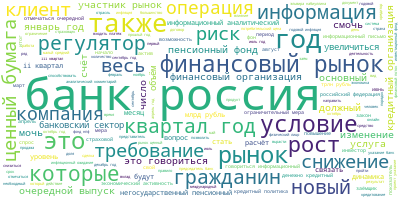

In [86]:
image

In [61]:
from io import BytesIO
import base64

buffered = BytesIO()
image.save(buffered, format="PNG")
img_str = base64.b64encode(buffered.getvalue())
img_str

b'iVBORw0KGgoAAAANSUhEUgAAAZAAAADICAIAAABJdyC1AAEAAElEQVR4nOxddZgcVbY/Ze1u4+4+E3cXohCBEIIGd9nFFl+WxRaXhcUhECAChJAQEuIuk2TcXbpnetq97P1Rk56e7h7JJLC89/h9881XfeXcW7e7Tp177hGEZVn4E3/iT/yJ/w3A/9sT+BN/4k8MARZYBJDfiDjF+pyUWYwrPbSDhwoRQFlgcIQgWS+GEAggLtrGR0UogrlpO8V45YQORYbmGwzDAgCKXuRp/8mw/sSf+M3hpm0ALI4InFSPGFcSqNBFmQGAQAUssADgY1x8VEoyLhGuBACScSMIyrJAMi6Dp45myQRxEQssAIIjBM3STqpHjKs5ahw787fnKAwfDY5TVtKAAkagAhYYBFAEEAEmaXWVafmJNqrb6uvS8ONZYLNkU6vth8eqLnM6vFaLU62VOe0esVRgMTkUKonT7kFQBABEYr7T7jH12FtbeqbPzrm4POv/EcOqtm63k51jNGsB4ITxYxkRJSWiqm3bZ0Y+CgDb2x4Zp71JzU89YHjF4mulGE+seNxYzVoA6HCdOWn8GEUwkvEsjnu1w3W61LzRQRkAEAmuy1OuFGCKEvPXc6P/DgA7O57MV14JABXWH2ZGPqp3l25puefS+HcihNlfNVxxVfK3Zm/jPsPLs6IelxHRQTPUu0vPmr7BEMJB6WNEY8dq1p41fS0mtKnS2QBQZ//VTZl0gpygsSKE2cU9n7c5TwJAgmRSgepKABhyrD/xe8JOdp02/5goHu2kelAEjxRmNDlOumlblDBT764R4Qo+Ko4SZpZYts+JvAsASizbWWDjRYUllu1SQgssQ7E+vbtGK0jioxKaJf0MS4Qr9e4aKaHxt+coDB/t7iqWpZW8aA/tEONKivVGCzPrHaeUvGgraZATETp+kod2CDEZhuASXIUh+OH95Zk5MT//eFoo5EmkAn2nBcNQoZBn7LLZrO6oWKVQyO

# [+] Выделение тем NLTK

https://www.toptal.com/python/topic-modeling-python

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\1PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from nltk.corpus import stopwords

In [7]:
# stopwords_list = stopwords.words('english') + stopwords.words('russian')

In [8]:
tmp = df0["text_prepared2"][:100].to_list()
corpus = []
for itm in tmp:
    # corpus.append(itm)
    for i in itm:
        corpus.append(i)
len(corpus)
# corpus

3092

In [9]:
count_vect = CountVectorizer()
x_counts = count_vect.fit_transform(corpus)
x_counts.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
# для контроля
count_vect.get_feature_names()

C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '10',
 '11',
 '14',
 '15',
 '17',
 '19',
 '199',
 '20',
 '200',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '207',
 '21',
 '246',
 '250',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '341',
 '35',
 '39',
 '41',
 '467',
 '48',
 '56',
 '600',
 '61',
 '62',
 '79',
 '83',
 '84',
 '86',
 '87',
 '870',
 'covid',
 'iii',
 'iv',
 'webmaster',
 'xii',
 'абсолютный',
 'август',
 'автокаско',
 'автор',
 'автострахования',
 'адрес',
 'акт',
 'актив',
 'активизация',
 'активно',
 'активность',
 'активный',
 'актуализация',
 'акция',
 'альтернатива',
 'анализ',
 'аналитический',
 'антикризисный',
 'апрель',
 'апрельский',
 'аспирант',
 'база',
 'базель',
 'базельский',
 'баланс',
 'банк',
 'банкнот',
 'банкнота',
 'банковский',
 'банкомат',
 'безналичный',
 'безопасность',
 'бесперебойный',
 'бесплатно',
 'беспрецедентный',
 'бизнес',
 'биржа',
 'бкбн',
 'бки',
 'благодаря',
 'благосостояние',
 'близкий',
 'блокчейн',
 'большинство',
 'большой',
 'борьба',
 'брокерск

In [11]:
tfidf_transformer = TfidfTransformer()
x_tfidf = tfidf_transformer.fit_transform(x_counts)

In [12]:
dimension = 20 # число кластеров/тем
lda = LDA(n_components = dimension)
lda_array = lda.fit_transform(x_tfidf)
lda_array

array([[0.025, 0.025, 0.025, ..., 0.025, 0.025, 0.025],
       [0.025, 0.025, 0.025, ..., 0.025, 0.025, 0.025],
       [0.025, 0.025, 0.025, ..., 0.025, 0.025, 0.025],
       ...,
       [0.025, 0.025, 0.025, ..., 0.025, 0.025, 0.025],
       [0.025, 0.025, 0.025, ..., 0.525, 0.025, 0.025],
       [0.025, 0.025, 0.025, ..., 0.025, 0.025, 0.025]])

In [13]:
topic_length = 5 # число слов в теме
components = [lda.components_[i] for i in range(len(lda.components_))]
features = count_vect.get_feature_names()
important_words = [sorted(features, key = lambda x: components[j][features.index(x)], reverse = True)[:topic_length] for j in range(len(components))]
important_words

[['условие', 'месяц', 'рост', 'операция', 'инвестор'],
 ['январь', 'очередной', 'также', 'достаточный', 'квартал'],
 ['информационный', 'повышение', 'экономика', 'спрос', 'увеличиться'],
 ['которые', 'половина', 'продажа', 'доступность', 'значительный'],
 ['банк', 'организация', 'аналитический', 'кредит', 'функционирование'],
 ['банковский', 'пандемия', 'гражданин', 'инфляция', 'рекомендовать'],
 ['россия', 'сектор', 'рубль', 'отмечаться', 'коронавирус'],
 ['мера', 'уровень', 'распространение', 'второй', 'свой'],
 ['снижение', 'председатель', 'результат', 'расчёт', 'бизнес'],
 ['изменение', 'требование', 'опубликовать', 'первый', 'ставка'],
 ['услуга', 'счёт', 'решение', 'цена', 'влияние'],
 ['это', 'система', 'март', 'информация', 'трлн'],
 ['кредитный', 'принять', 'потребительский', 'иностранный', 'население'],
 ['рынок', 'динамика', 'лицо', 'ожидание', 'реализация'],
 ['2020', 'российский', 'инфекция', 'волатильность', 'инвестиционный'],
 ['комментарий', 'клиент', 'соответствующий',

# [ ] Выделение тем gensim

https://medium.com/nlplanet/text-analysis-topic-modelling-with-spacy-gensim-4cd92ef06e06#1a04

# [ ] Выделение тем Intel NLP Architect (только linux и mac)

In [ ]:
!pip install nlp-architect

# [+] Кластеризация

https://towardsdatascience.com/clustering-documents-with-python-97314ad6a78d

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [36]:
' '.join(list(df0['text_prepared2'][:100].apply(lambda x: ' '.join(x)).values))

'начало год ожидать население инфляция снизиться 8,3 декабрь — 9,0 отмечаться очередной комментарий банк россия инфляционный ожидание потребительский настроение динамика указывать разовый характер повышение предыдущий месяц средневзвешенный процентный ставка ипотечный жилищный кредит ижк рубль последний месяц 2019 год достигнуть минимальный весь история наблюдение значение – 9 это свидетельствовать данные опубликовать сайт банк россия подвести первый итог деятельность рабочий группа банк россия оптимизация регуляторный нагрузка участник финансовый рынок которая создать август 2019 год её работа направить актуализация нормативный база вопрос относиться компетенция мегарегулятор банк россия научный журнал деньга кредит объявлять приём работа второй конкурс экономический исследование студент аспирант вуз 2020 год банк россия намеренный выпустить 35 нормативный акт приоритет первый очередь которые издаваться исполнение принять федеральный закон 199 нормативный акт – приоритет второй очеред

In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer()
x = v.fit_transform(df0['text_prepared2'][:100].apply(lambda x: ' '.join(x)).values)
# ' '.join(list(df0['text_prepared2'].apply(lambda x: ' '.join(x)).values))
df_tmp = df0.iloc[:, :100].copy()
len(list(x.toarray()))
print(x.toarray().shape)
df_tmp['tf-idf']=pd.Series(list(x.toarray()))
df_tmp.head(5)

(100, 1039)


Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  \
0             0             0             0           0   
1             1             1             1           1   
2             2             2             2           2   
3             3             3             3           3   
4             4             4             4           4   

                                       url  \
0  https://www.cbr.ru/press/event/?id=6349   
1  https://www.cbr.ru/press/event/?id=6350   
2  https://www.cbr.ru/press/event/?id=6352   
3  https://www.cbr.ru/press/event/?id=6355   
4  https://www.cbr.ru/press/event/?id=6357   

                                               title  \
0  Инфляционные ожидания в январе преимущественно...   
1  Средневзвешенная ставка по ипотечным кредитам ...   
2  Банк России одобрил более 100 инициатив рынка ...   
3  Объявлен сбор заявок на Конкурс экономических ...   
4  Банк России публикует план подготовки норматив...   

                                                text                 date  \
0  В начале года ожидаемая населением инфляция сн...  2020-01-30T00:00:00   
1  Средневзвешенная процентная ставка по ипотечны...  2020-01-30T00:00:00   
2  Подведены первые итоги деятельности Рабочей гр...  2020-01-31T00:00:00   
3  Банк России и научный журнал «Деньги и кредит»...  2020-02-06T00:00:00   
4  В 2020 году Банк России намерен выпустить 35 н...  2020-02-07T00:00:00   

   url_preview                                         text_clean  \
0          NaN  в начале года ожидаемая населением инфляция сн...   
1          NaN  средневзвешенная процентная ставка по ипотечны...   
2          NaN  подведены первые итоги деятельности рабочей гр...   
3          NaN  банк россии и научный журнал «деньги и кредит»...   
4          NaN  в 2020 году банк россии намерен выпустить 35 н...   

                                         title_clean  \
0  инфляционные ожидания в январе преимущественно...   
1  средневзвешенная ставка по ипотечным кредитам ...   
2  банк россии одобрил более 100 инициатив рынка ...   
3  объявлен сбор заявок на конкурс экономических ...   
4  банк россии публикует план подготовки норматив...   

                                       text_prepared  \
0  [в, начало, год, ожидать, население, инфляция,...   
1  [средневзвешенный, процентный, ставка, по, ипо...   
2  [подвести, первый, итог, деятельность, рабочий...   
3  [банк, россия, и, научный, журнал, ", деньга, ...   
4  [в, 2020, год, банк, россия, намеренный, выпус...   

                                      title_prepared  \
0  [инфляционный, ожидание, в, январь, преимущест...   
1  [средневзвешенный, ставка, по, ипотечный, кред...   
2  [банк, россия, одобрить, более, 100, инициатив...   
3  [объявить, сбор, заявка, на, конкурс, экономич...   
4  [банк, россия, публиковать, план, подготовка, ...   

                                      text_prepared2  \
0  [начало, год, ожидать, население, инфляция, сн...   
1  [средневзвешенный, процентный, ставка, ипотечн...   
2  [подвести, первый, итог, деятельность, рабочий...   
3  [банк, россия, научный, журнал, деньга, кредит...   
4  [2020, год, банк, россия, намеренный, выпустит...   

                                     title_prepared2  \
0  [инфляционный, ожидание, январь, преимуществен...   
1  [средневзвешенный, ставка, ипотечный, кредит, ...   
2  [банк, россия, одобрить, 100, инициатива, рыно...   
3  [объявить, сбор, заявка, конкурс, экономически...   
4  [банк, россия, публиковать, план, подготовка, ...   

                                              tf-idf  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19970534...

In [138]:
x_tfidf

<3092x1039 sparse matrix of type '<class 'numpy.float64'>'
	with 3038 stored elements in Compressed Sparse Row format>

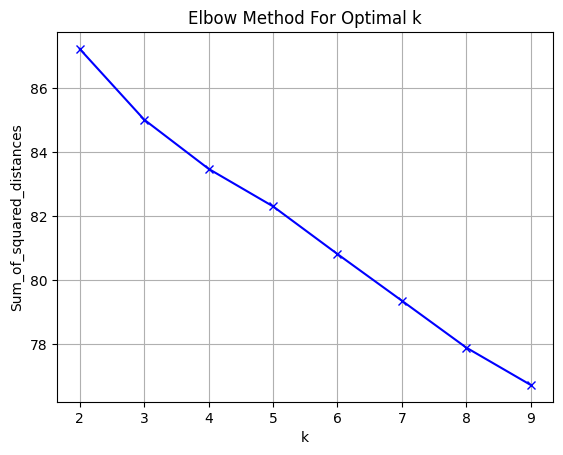

In [38]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(x)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

In [39]:
df_tmp = df_tmp.drop(axis=1,columns=['cluster'])

KeyError: "['cluster'] not found in axis"

In [41]:
n_clusters = 20
model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=200, n_init=10)
model.fit(x)
labels=model.labels_

labels

df_tmp['labels']=pd.Series(labels, dtype=int)

df_tmp.head(20)

# print(wiki_cl.sort_values(by=['cluster']))

Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  \
0              0             0             0           0   
1              1             1             1           1   
2              2             2             2           2   
3              3             3             3           3   
4              4             4             4           4   
5              5             5             5           5   
6              6             6             6           6   
7              7             7             7           7   
8              8             8             8           8   
9              9             9             9           9   
10            10            10            10          10   
11            11            11            11          11   
12            12            12            12          12   
13            13            13            13          13   
14            14            14            14          14   
15            15            15            15          15   
16            16            16            16          16   
17            17            17            17          17   
18            18            18            18          18   
19            19            19            19          19   

                                        url  \
0   https://www.cbr.ru/press/event/?id=6349   
1   https://www.cbr.ru/press/event/?id=6350   
2   https://www.cbr.ru/press/event/?id=6352   
3   https://www.cbr.ru/press/event/?id=6355   
4   https://www.cbr.ru/press/event/?id=6357   
5   https://www.cbr.ru/press/event/?id=6362   
6   https://www.cbr.ru/press/event/?id=6365   
7   https://www.cbr.ru/press/event/?id=6366   
8   https://www.cbr.ru/press/event/?id=6367   
9   https://www.cbr.ru/press/event/?id=6368   
10  https://www.cbr.ru/press/event/?id=6372   
11  https://www.cbr.ru/press/event/?id=6374   
12  https://www.cbr.ru/press/event/?id=6379   
13  https://www.cbr.ru/press/event/?id=6381   
14  https://www.cbr.ru/press/event/?id=6382   
15  https://www.cbr.ru/press/event/?id=6383   
16  https://www.cbr.ru/press/event/?id=6384   
17  https://www.cbr.ru/press/event/?id=6387   
18  https://www.cbr.ru/press/event/?id=6389   
19  https://www.cbr.ru/press/event/?id=6390   

                                                title  \
0   Инфляционные ожидания в январе преимущественно...   
1   Средневзвешенная ставка по ипотечным кредитам ...   
2   Банк России одобрил более 100 инициатив рынка ...   
3   Объявлен сбор заявок на Конкурс экономических ...   
4   Банк России публикует план подготовки норматив...   
5   Нерезиденты в январе продолжали наращивать вло...   
6   Компании и граждане в 2019 году нарастили свой...   
7   Банк России открывает набор слушателей IV Летн...   
8   Пенсионные средства НПФ по итогам 2019 года до...   
9   Обращения о восстановлении деловой репутации: ...   
10      Инфляция будет постепенно возвращаться к цели   
11  Количество индивидуальных инвестиционных счето...   
12  Банк России обсудит с рынком порядок раскрытия...   
13  Банк России рассчитал размер участия иностранн...   
14          Замедление инфляции в январе продолжилось   
15  Рекомендации банкам и НФО: как не допустить ут...   
16  В январе динамика российских индексов соответс...   
17  Выпуск цифровых прав на блокчейн-платформе: пи...   
18     Банк России приглашает студентов на стажировку   
19  Рынок ПИФ в 2019 году превысил 4 трлн рублей: ...   

                                                 text                 date  \
0   В начале года ожидаемая населением инфляция сн...  2020-01-30T00:00:00   
1   Средневзвешенная процентная ставка по ипотечны...  2020-01-30T00:00:00   
2   Подведены первые итоги деятельности Рабочей гр...  2020-01-31T00:00:00   
3   Банк России и научный журнал «Деньги и кредит»...  2020-02-06T00:00:00   
4   В 2020 году Банк России намерен выпустить 35 н...  2020-02-07T00:00:00   
5   В январе 2020 г., несмотря на ослабление интер...  2020-02-10T00:00:00   
6   Долг не

In [54]:
list(df_tmp.loc[df_tmp['labels'] == 3]['text_prepared2'].values)

[['годовой',
  'инфляция',
  'первый',
  'месяц',
  'год',
  'замедлиться',
  '0,6',
  'п.п',
  '2,4',
  'значительный',
  'степень',
  'снижение',
  'связать',
  'выход',
  'расчёт',
  'повышение',
  'ставка',
  'ндс',
  'прошлый',
  'год',
  'также',
  'существенный',
  'влияние',
  'оказывать',
  'расширение',
  'предложение',
  'продукт',
  'питание',
  'укрепление',
  'рубль',
  '2019',
  'год',
  'сдержанный',
  'динамика',
  'спрос',
  'отмечаться',
  'очередной',
  'выпуск',
  'информационный',
  'аналитический',
  'комментарий',
  'банк',
  'россия',
  'динамика',
  'потребительский',
  'цена'],
 ['февраль',
  '2020',
  'год',
  'сохраняться',
  'дезинфляционные',
  'тенденция',
  'влияние',
  'целое',
  'высокий',
  'насыщенность',
  'продовольственный',
  'рынок',
  'сдержанный',
  'спрос',
  'лаговых',
  'эффект',
  'укрепление',
  'рубль',
  'предыдущий',
  'месяц',
  'вместе',
  'начало',
  'март',
  'произойти',
  'значительный',
  'изменение',
  'внешний',
  'условие',


In [56]:
df0.index.to_list()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [82]:
df_tmp = df0[:][15:20]
df_tmp.iloc[0]

Unnamed: 0.3                                                      15
Unnamed: 0.2                                                      15
Unnamed: 0.1                                                      15
Unnamed: 0                                                        15
url                          https://www.cbr.ru/press/event/?id=6383
title              Рекомендации банкам и НФО: как не допустить ут...
text               Банк России выпустил рекомендации для банков и...
date                                             2020-02-14T00:00:00
url_preview                                                      NaN
text_clean         банк россии выпустил рекомендации для банков и...
title_clean        рекомендации банкам и нфо: как не допустить ут...
text_prepared      [банк, россия, выпустить, рекомендация, для, б...
title_prepared     [рекомендация, банк, и, нфо, :, как, не, допус...
text_prepared2     [банк, россия, выпустить, рекомендация, банк, ...
title_prepared2    [рекомендация, 

# [+] Ключевые слова для фильтрации релевантного текста к ролям

In [5]:
# Генеральный директор (часто владелец бизнеса) - отвечает за развитие и финансовую эффективность
# бизнеса. Ему важно понимать точки роста, возможности для масштабирования и
# удовлетворения запросов конечного клиента

stakeholder_keywords = [
    'развитие',
    'эффективность',
    'эффективный',
    'рост',
    'спрос',
    'прибыль',
    'клиент',
    'потребитель',
    'настроение',
    'будущий',
    'будущее',
    'перспектива',
    'перспективный',
    'актив',
    'устойчивый',
    
    
    'снижение',
    'повышение',
    'мера',
    'поддежка',
]

# Бухгалтер (часто отдельное подразделение) - отвечает за операционную поддержку бизнеса,
# регулярную отчётность и выполнение требований законодательства. Этой роли важно быть в курсе
# последней информации о нормативных актах, условиях работы с банками и взаимодействия с контрагентами

bookkeeper_keywords = [
    'закон',
    'акт',
    'нормативный',
    'законопроект',
    'законодательство',
    'правило',
    'изменение',
    'требование',
    'норматив',
    'норма',
    'статья',
    'договор',
    'ставка',
    
    'принят',
    'принять',
    'рассмотрен',
    'закрепить',
    'изменить',
    'изменение',
    'изменён',
    'изменен',
    
    'госдума',
    'дума',
    'регулятор',
]

# [-] (нужно вручную настраивать) Извлечение краткого описания/аннотации/text summarization

https://www.activestate.com/blog/how-to-do-text-summarization-with-python/

In [104]:
string_to_analyze = ' '.join(list(df0['text_prepared2'][0:1000].apply(lambda x: ' '.join(x)).values))

In [107]:
import spacy
from string import punctuation
from heapq import nlargest

def summarize(text, per):
    nlp = spacy.load('ru_core_news_lg')
    doc= nlp(text)
    tokens=[token.text for token in doc]
    word_frequencies={}
    for word in doc:
        if word.text.lower() not in stopwords_list:
            if word.text.lower() not in punctuation:
                if word.text not in word_frequencies.keys():
                    word_frequencies[word.text] = 1
                else:
                    word_frequencies[word.text] += 1
    # print("word_frequencies = ", word_frequencies)
    max_frequency=max(word_frequencies.values())
    for word in word_frequencies.keys():
        word_frequencies[word]=word_frequencies[word]/max_frequency
    sentence_tokens= [sent for sent in doc.sents]
    sentence_scores = {}
    for sent in sentence_tokens:
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if sent not in sentence_scores.keys():                            
                    sentence_scores[sent]=word_frequencies[word.text.lower()]
                else:
                    sentence_scores[sent]+=word_frequencies[word.text.lower()]
    select_length=int(len(sentence_tokens)*per)
    summary=nlargest(select_length, sentence_scores,key=sentence_scores.get)
    final_summary=[word.text for word in summary]
    summary=''.join(final_summary)
    return summary

In [114]:
summarize(string_to_analyze, 0.05)

'начало год ожидать население инфляция снизиться 8,3 декабрь — 9,0 отмечаться очередной комментарий банк россия инфляционный ожидание потребительский настроение динамика указывать разовый характер повышение предыдущий месяц средневзвешенный процентный ставка ипотечный жилищный кредит ижк рубль последний месяц 2019 год достигнуть минимальный весь история наблюдение значение – 9 это свидетельствовать данные опубликовать сайт банк россия подвести первый итог деятельность рабочий группа банк россия оптимизация регуляторный нагрузка участник финансовый рынок которая создать август 2019 год её работа направить актуализация нормативный база вопрос относиться компетенция мегарегулятор банк россия научный журнал деньга кредит объявлять приём работа второй конкурс экономический исследование студент аспирант вуз 2020 год банк россия намеренный выпустить 35 нормативный акт приоритет первый очередь которые издаваться исполнение принять федеральный закон 199 нормативный акт – приоритет второй очеред

In [49]:
df0.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'url',
       'title', 'text', 'date', 'url_preview', 'text_clean', 'title_clean',
       'text_prepared', 'title_prepared', 'text_prepared2', 'title_prepared2'],
      dtype='object')

# [+] Сборка ML-ядра

In [10]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation as LDA

from wordcloud import WordCloud

import base64
from base64 import b64encode
from io import BytesIO

def extract_digest(df, keywords):
    """
    Функция возвращает набор дайджестов, а также изображение - облако тегов
    
    Args:
    
    df - PandasDataframe со срезом новостей, уже очищенные и лемматизиованные колонки
    ['url', 'title', 'text', 'date', 'url_preview', 'text_prepared2', 'title_prepared2']
    
    keywords - list ключевых слов для фильтации тем для данного типа пользователя
    
    """
    result = []
    
    # кластеризация
    text_to_clusterize = df['text_prepared2'].apply(lambda x: ' '.join(x)).values
    print("text_to_clusterize = ", text_to_clusterize) # отладка
    v = TfidfVectorizer()
    x = v.fit_transform(text_to_clusterize)
    df_tmp = df.copy()
    df_tmp['tf-idf']=pd.Series(list(x.toarray()))
    n_clusters = 20
    model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=200, n_init=10)
    model.fit(x)
    labels=model.labels_
    df_tmp['labels']=pd.Series(labels, dtype=int)

    # выделение тем из кластеров
    for label in labels:
        cluster_df = df_tmp[df_tmp['labels'] == label]
        news_ids = cluster_df.index.to_list()
        cluster_news = cluster_df['text_prepared2'].to_list()
        cluster_words = []
        for itm in cluster_news:
            for i in itm:
                cluster_words.append(i)
        count_vect = CountVectorizer()
        x_counts = count_vect.fit_transform(cluster_words)
        x_counts.todense()
        tfidf_transformer = TfidfTransformer()
        x_tfidf = tfidf_transformer.fit_transform(x_counts)
        dimension = 1 # число кластеров/тем
        lda = LDA(n_components = dimension)
        lda_array = lda.fit_transform(x_tfidf)
        topic_length = 5 # число слов в теме
        components = [lda.components_[i] for i in range(len(lda.components_))]
        features = count_vect.get_feature_names()
        important_words = [sorted(features, key = lambda x: components[j][features.index(x)], reverse = True)[:topic_length] for j in range(len(components))]     
        
        long_string = ','.join(list(df['text_prepared2'].apply(lambda x: ','.join(x)).values))
        wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
        # Generate a word cloud
        wordcloud.generate(long_string)
        # Visualize the word cloud
        image = wordcloud.to_image()
        
        buffered = BytesIO()
        image.save(buffered, format="PNG")
        img_b64str = base64.b64encode(buffered.getvalue())
        
        result.append({
            "topic":important_words,
            "title":cluster_df["title"].iloc[0],
            "news":news_ids,
            "image_tags":img_b64str,
        })
        
    
    # фильтрация тем
    #     TODO
    
    
    return result

In [11]:
# тестирование

df_sample_news = df_final[:][:50]
result = extract_digest(df_sample_news, bookkeeper_keywords)
result

text_to_clusterize =  ['начало год ожидать население инфляция снизиться 8,3 декабрь — 9,0 отмечаться очередной комментарий банк россия инфляционный ожидание потребительский настроение динамика указывать разовый характер повышение предыдущий месяц'
 'средневзвешенный процентный ставка ипотечный жилищный кредит ижк рубль последний месяц 2019 год достигнуть минимальный весь история наблюдение значение – 9 это свидетельствовать данные опубликовать сайт банк россия'
 'подвести первый итог деятельность рабочий группа банк россия оптимизация регуляторный нагрузка участник финансовый рынок которая создать август 2019 год её работа направить актуализация нормативный база вопрос относиться компетенция мегарегулятор'
 'банк россия научный журнал деньга кредит объявлять приём работа второй конкурс экономический исследование студент аспирант вуз'
 '2020 год банк россия намеренный выпустить 35 нормативный акт приоритет первый очередь которые издаваться исполнение принять федеральный закон 199 нормат

C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed

[{'topic': [['инфляция', 'год', 'банк', 'ожидание', 'ожидать']],
  'title': 'Инфляционные ожидания в\xa0январе преимущественно снижались',
  'news': [0, 10, 30],
  'image_tags': b'iVBORw0KGgoAAAANSUhEUgAAAZAAAADICAIAAABJdyC1AAEAAElEQVR4nOy9dXgbx/Y/fJbELFlmptiOIczM0CRlZmZmvmVukzKnTGnShhvmOGiImVnMrIX3DzmyLEuy7Ljt/f7e+3nytKvZMzNn17tnZw4iDMPA//A//A//w/8FoP82A/+38eHafbc88j0AqDTmVTd8dPBY07/N0b+DH9s/bbU3MMC8WH0/A//7BP4P54Sf3tny2wd/AcC3r/352/vbA0/hIzWH20taHW4eh4UAMAAMzeA4qrc4ZEKew+XhsAkMRSiaYWiGIDCTzamUCEZq6n8RDMMAwwCA7/8I8m8z9C9hmmLexu6fCJQ1I2YhAv9/vQv/wwhh/qVTXrv18/IDdaSXfOLzWwJPISO1Jfx5dxmPQ3BZxPHajrG5SdUt6jHZid1687jc5PX7K5OVEoZhYqSC6ha1kM/u0VkeuGQWn8uKPCZJ20jGwUIlHtqEIzya8aAIG0PYNJBuUsPGFBjKc1EamnaxcSVJ2xmgaNrFxRMQZMQE8f/wP/wP/z0YsRcbx1Cz3YUgCIdF1HdoC9JjK5t7SJo+3dDFYeNiPkcs4JQ1dhekx3q8VFaigsshBh2z3foLjgo8lNFJdqWLrumyb+YTaQQqpBmvm9IigEvYhSxMpnLsUnCndFh/yxDfqHLsShNdFeUnvq3L8P260pOV7UaTg8Mh4pSiJXNGX7x8LAC8+fGOP7aX//HV7TIJ309/5V1fAsD379/gb/nzr4oN28vaOgwEgRWOSrjhsql52fG+Uxff8qlKawk57zvPXTy+ODU6